In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_circles

In [7]:
X,y=make_circles(n_samples=50)

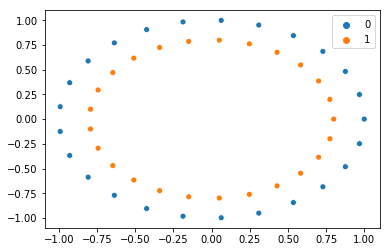

In [11]:
sns.scatterplot(X[:,0],X[:,1],hue=y)
plt.show()

In [40]:
### split data into training and test
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=10)

In [41]:
x_train.shape,x_test.shape

((35, 2), (15, 2))

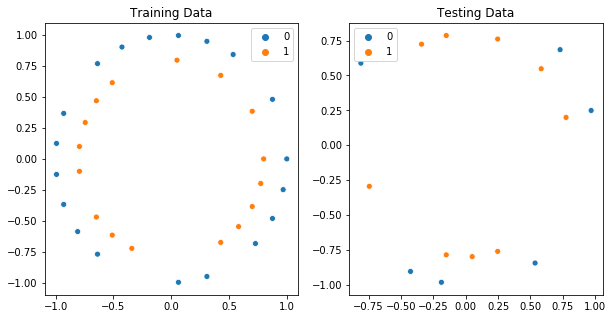

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x_train[:,0],x_train[:,1],hue=y_train)
plt.title('Training Data')

plt.subplot(1,2,2)
sns.scatterplot(x_test[:,0],x_test[:,1],hue=y_test)
plt.title('Testing Data')
plt.show()

In [43]:
## Training model with DT
from sklearn import tree

In [44]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
print('Model trained sucessfully !!!')

Model trained sucessfully !!!


In [45]:
# visualizing tree
import graphviz 

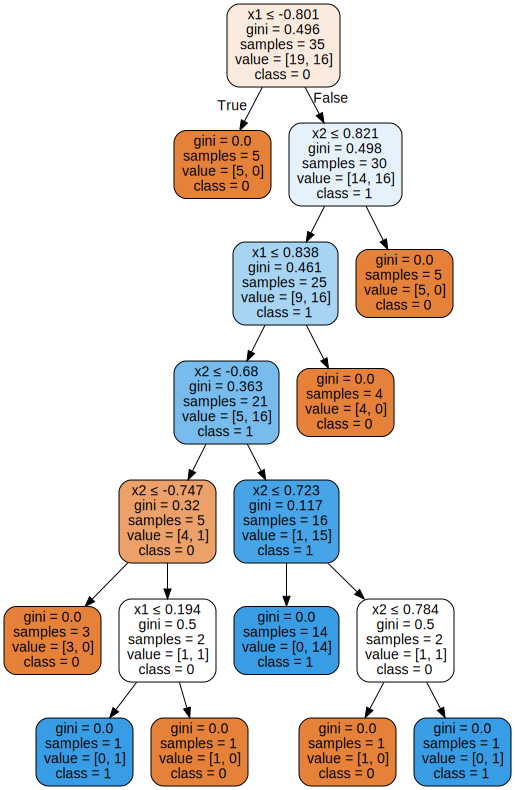

In [46]:
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['x1','x2'],  
                      class_names=['0','1'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [49]:
# saving tree diagram
graph.render('srikanth1')

'srikanth1.pdf'

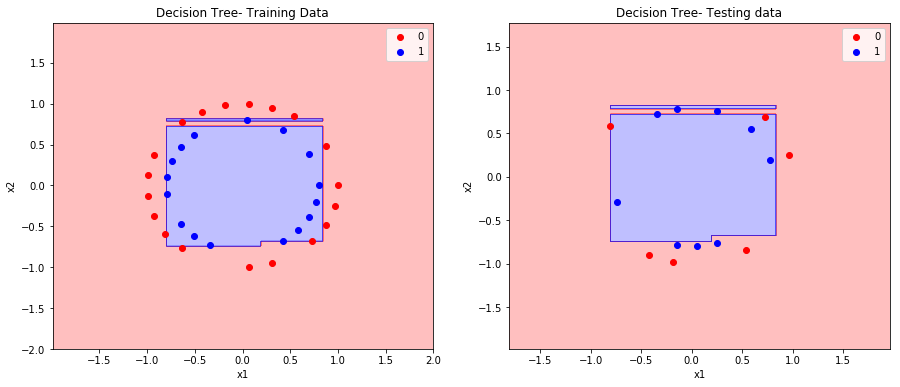

In [48]:
# Visualising the Training set results
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
               color = ['red', 'blue'][i], label = j)

   
plt.title('Decision Tree- Training Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()


plt.subplot(1,2,2)
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
               color = ['red', 'blue'][i], label = j)

   
plt.title('Decision Tree- Testing data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()